# WAP to demonstrate the effect of temperature on the probability of choosing an inferior node by selecting an appropriate temperature schedule.

## Importing Libraries

In [2]:
import math
import random
import matplotlib.pyplot as plt

## Defining Functions

In [4]:
# Objective function (for demonstration, using a simple quadratic function)
def objective_function(x):
    return x**2

# Simulated Annealing Algorithm
def simulated_annealing():
    current_solution = random.uniform(-10, 10)  # Initial solution (random value between -10 and 10)
    current_energy = objective_function(current_solution)  # Energy (objective function value)

    temperature_schedule = []  # To store temperature schedule and probability data
    acceptance_probabilities = []  # To store the acceptance probability data

    # Initial temperature and cooling rate
    temperature = 10000
    cooling_rate = 0.99
    min_temperature = 1e-3

    while temperature > min_temperature:
        # Generate a new candidate solution
        new_solution = current_solution + random.uniform(-1, 1)
        new_energy = objective_function(new_solution)

        # Calculate the change in energy
        delta_energy = new_energy - current_energy

        # If the new solution is better, accept it
        if delta_energy < 0:
            current_solution = new_solution
            current_energy = new_energy
        else:
            # If the new solution is worse, accept it with a probability based on temperature
            acceptance_probability = math.exp(-delta_energy / temperature)
            if random.random() < acceptance_probability:
                current_solution = new_solution
                current_energy = new_energy

        # Store the temperature and probability data
        temperature_schedule.append(temperature)
        acceptance_probabilities.append(acceptance_probability)

        # Cool down the temperature
        temperature *= cooling_rate

    return temperature_schedule, acceptance_probabilities

## Run the Simulated Annealing algorithm

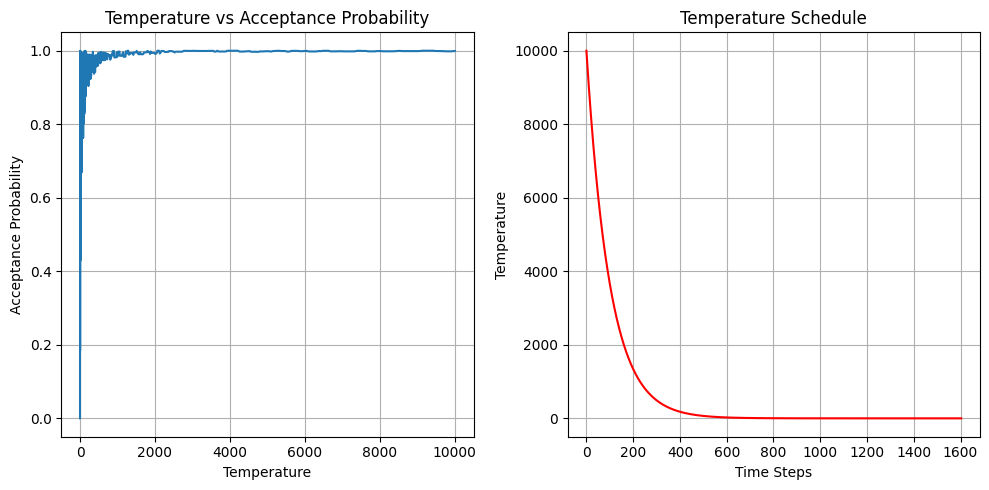

In [3]:
temperature_schedule, acceptance_probabilities = simulated_annealing()

# Plot the effect of temperature on the probability of choosing an inferior node
plt.figure(figsize=(10, 5))

# Plot temperature vs acceptance probability
plt.subplot(1, 2, 1)
plt.plot(temperature_schedule, acceptance_probabilities, label="Acceptance Probability")
plt.xlabel("Temperature")
plt.ylabel("Acceptance Probability")
plt.title("Temperature vs Acceptance Probability")
plt.grid(True)

# Plot temperature vs time steps
plt.subplot(1, 2, 2)
plt.plot(range(len(temperature_schedule)), temperature_schedule, label="Temperature", color='r')
plt.xlabel("Time Steps")
plt.ylabel("Temperature")
plt.title("Temperature Schedule")
plt.grid(True)

plt.tight_layout()
plt.show()
